## Sales Prediction using Machine Learning

### Forecasting sales is a difficult problem for every type of business, but it helps determine where a business should spend more on advertising and where it should cut spending.

### Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing, given the dataset advertising.csv

#### Data
The advertising dataset, to analyse the relationship between media and 'sales' using a simple linear regression model.

In [1]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
# Shape of Data
print("Shape of Data: ", data.shape)

Shape of Data:  (200, 4)


### Analyzing data

In [7]:
# Checking for null values
print("Null Values :\n",data.isnull().sum())

Null Values :
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


There are no NULL values in the dataset, hence we can say it is clean.

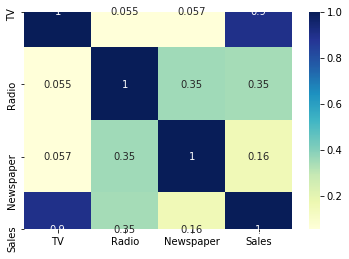

In [8]:
# Checking the correlation between different variables in the dataset.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Check for Outliers

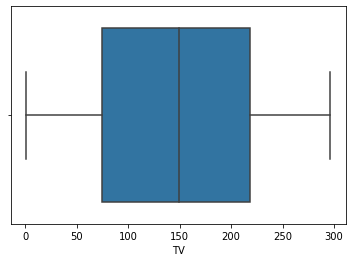

In [9]:
sns.boxplot(data["TV"])

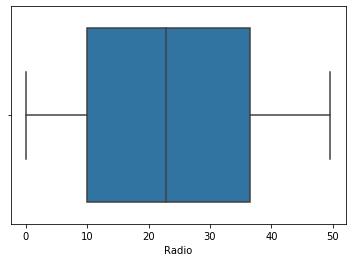

In [10]:
sns.boxplot(data["Radio"])

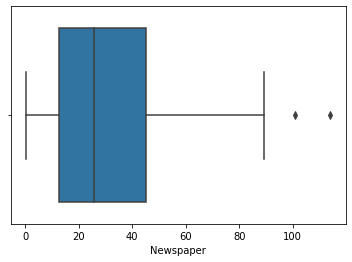

In [11]:
sns.boxplot(data["Newspaper"])

In [12]:
data = data[data['Newspaper'] < 80]

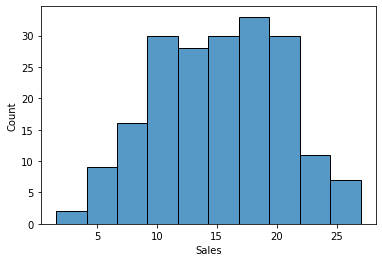

In [13]:
sns.histplot(data["Sales"])

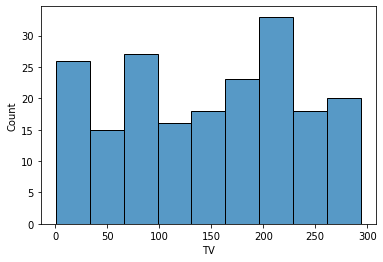

In [14]:
sns.histplot(data["TV"])

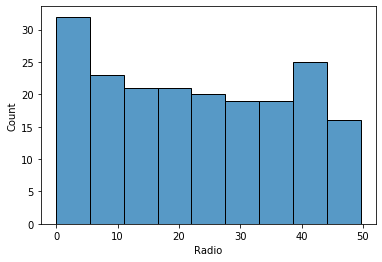

In [15]:
sns.histplot(data["Radio"])

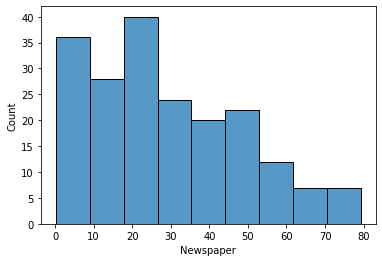

In [16]:
sns.histplot(data["Newspaper"])

### Model Building

**Performing Linear Regression**

Equation of linear regression : $ y=c+m_1x_1+m_2x_2+...+m_nx_n $

- y  is the response
- c is the intercept
- $m_1$ is the coefficient for the first feature
- $m_n$ is the coefficient for the nth feature

The m values are called the model parameters.

In [17]:
# Splitting Data into X and Y arrays
from sklearn.model_selection import train_test_split

X = np.array(data.loc[:, ["TV", "Radio", "Newspaper"]])
y = np.array(data["Sales"])

In [18]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit(X).transform(X)

In [19]:
# Splitting the data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
import statsmodels.api as sm

ols_model = sm.OLS(y,X)

In [21]:
result = ols_model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2761.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                   3.40e-158
Time:                        20:53:08   Log-Likelihood:                         -451.05
No. Observations:                 196   AIC:                                      908.1
Df Residuals:                     193   BIC:                                      917.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
# Fitting the data to Linear Regression Model using LinearRegression()
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Predicting the sales for test data

y_pred = lr_model.predict(X_test)

In [24]:
# Predicted Data
print("Predicted Sales Data:\n", y_pred)

Predicted Sales Data:
 [16.86090407 19.54802918 12.7405299  17.86676328 12.3499596  17.33929393
  9.77906877 21.18524428  8.54266676  9.88216268  9.69995968 17.53743896
 21.64769516 11.54807702 19.3672392  18.13749566 17.06447613 11.62960911
  8.32294111 23.81213157 18.94246856 15.95606709 16.6069682  18.88233432
 13.95279941 14.83775911 14.07409998 10.54687588  6.02359456  9.34570673
 23.68885667 15.8189115  22.92569709 23.30391471  5.14672207 13.2075743
  9.59573765  7.02206141 24.46745094 21.13696354 21.43008172 11.04055104
  7.77408718 18.16385735 10.28333739 12.39591102 18.27240589  7.35803601
 19.44814148]


In [25]:
# Checking the RMSE Error
from sklearn.metrics import mean_squared_error

print("Root Mean Squared Error (RMSE) : ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE) :  1.3015744275893706


In [26]:
lr_model.score(X, y)

0.9008819291964022

### RandomForest Regression Model

In [27]:
# fit the model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [28]:
yhat = rf_model.predict(X_test)

In [29]:
# Checking the RMSE Error

print("Root Mean Squared Error (RMSE) : ", np.sqrt(mean_squared_error(y_test, yhat)))

Root Mean Squared Error (RMSE) :  0.9572110316871991


In [30]:
rf_model.score(X, y)

0.984815304975895

### K-Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [32]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 156, Test set:40
Fold:2, Train set: 157, Test set:39
Fold:3, Train set: 157, Test set:39
Fold:4, Train set: 157, Test set:39
Fold:5, Train set: 157, Test set:39


In [33]:
score = cross_val_score(lr_model, X, y, cv= kf)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.90948557 0.92186399 0.78858428 0.90655593 0.93802787]
Average score: 0.89


In [34]:
score = cross_val_score(rf_model, X, y, cv= kf)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.92487625 0.94593855 0.86553744 0.93821178 0.96929023]
Average score: 0.93


In [35]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
n_estimators = [10, 50, 100, 1000]

for val in max_depth:
    for estimators in n_estimators:
        score = cross_val_score(RandomForestRegressor(n_estimators = estimators, max_depth= val), X, y, cv= kf)
        print(f'Average score(max_depth - {val}, n_estimators - {estimators}): {"{:.3f}".format(score.mean())}')

Average score(max_depth - 1, n_estimators - 10): 0.645
Average score(max_depth - 1, n_estimators - 50): 0.641
Average score(max_depth - 1, n_estimators - 100): 0.648
Average score(max_depth - 1, n_estimators - 1000): 0.647
Average score(max_depth - 2, n_estimators - 10): 0.828
Average score(max_depth - 2, n_estimators - 50): 0.833
Average score(max_depth - 2, n_estimators - 100): 0.829
Average score(max_depth - 2, n_estimators - 1000): 0.830
Average score(max_depth - 3, n_estimators - 10): 0.889
Average score(max_depth - 3, n_estimators - 50): 0.887
Average score(max_depth - 3, n_estimators - 100): 0.889
Average score(max_depth - 3, n_estimators - 1000): 0.891
Average score(max_depth - 4, n_estimators - 10): 0.904
Average score(max_depth - 4, n_estimators - 50): 0.913
Average score(max_depth - 4, n_estimators - 100): 0.917
Average score(max_depth - 4, n_estimators - 1000): 0.915
Average score(max_depth - 5, n_estimators - 10): 0.917
Average score(max_depth - 5, n_estimators - 50): 0.92

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth= 10)

score = cross_val_score(rf_model, X, y, cv= kf)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.92395651 0.9482565  0.86947451 0.93836063 0.96923225]
Average score: 0.93
